# Sales Analysis

### Import Necessary Libraries

In [102]:
import pandas as pd
import os

### Task 1: Marge the 12 month sales data in single Csv file

In [2]:
files=[file for file in os.listdir("./Sales data")]
All_Months_Data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales data/"+file)
    All_Months_Data=pd.concat([All_Months_Data,df])
#Save data as csv file
All_Months_Data.to_csv("All Month data",index=False)

In [4]:
All_Months_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Read in Updated DataFrame

In [188]:
all_data=pd.read_csv("All Month data")
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [189]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

#### drop nana rows!

In [190]:
nan_data=all_data[all_data.isna().any(axis=1)]
nan_data.isna().sum() #For count Nan values column wise

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [191]:
#Drop all the rows with nan values
all_data=all_data.dropna()

In [192]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Find 'Or' and delete it!

In [193]:
temp_data=all_data[all_data["Order Date"].str[0:2]=='Or']
temp_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


####  Store data without "Or" by not Equal to condition

In [194]:
all_data=all_data[all_data["Order Date"].str[0:2]!='Or']

### Task 2: Add Month column

In [195]:
all_data.loc[:,['Month']]=all_data["Order Date"].str[0:2]

In [196]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Change data type from object type to int32

In [197]:
all_data.loc[:,["Month"]]=all_data.loc[:,["Month"]].astype("int32")
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


In [198]:
all_data1=all_data.loc[:,["Order Date"]]
all_data1

,Order Date
0,04/19/19 08:46
2,04/07/19 22:30
3,04/12/19 14:38
4,04/12/19 14:38
5,04/30/19 09:27
...,...
186845,09/17/19 20:56
186846,09/01/19 16:00
186847,09/23/19 07:39
186848,09/19/19 17:30


### Convert the column as current type

In [199]:
all_data.loc[:,['Quantity Ordered']]=pd.to_numeric(all_data["Quantity Ordered"])
all_data.loc[:,['Price Each']]=pd.to_numeric(all_data['Price Each'])

In [200]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add Sales column

In [201]:
all_data.loc[:,["Sales"]]=all_data["Quantity Ordered"]*all_data["Price Each"]

In [202]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: Add city column

In [203]:
#let's use apply() funtion
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(",")[2].split(' ')[1]

all_data["City"]=all_data["Purchase Address"].apply(lambda x:f"{get_city(x)} ({get_state(x)})")

In [204]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [291]:
GroupbyMonth=all_data
GroupbyMonth=GroupbyMonth.drop("Order Date", axis=1)
GroupbyMonth=GroupbyMonth.groupby('Month').sum()
GroupbyMonth.loc[:,['Quantity Ordered','Price Each','Sales']]

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.020001,3390670.240001
5,18667,3135125.130001,3152606.750001
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [292]:
import matplotlib.pyplot as plt

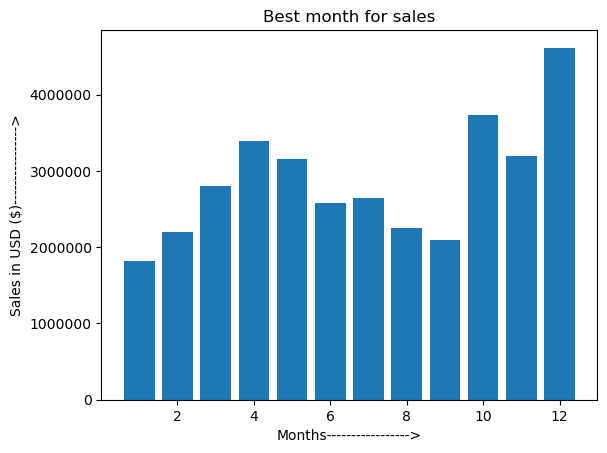

In [293]:
xplot=range(1,13) #for Month
yplot=GroupbyMonth['Sales']
yplot
plt.ticklabel_format(style='plain')
plt.bar(xplot,yplot)
plt.title("Best month for sales")
plt.xlabel("Months----------------->")
plt.ylabel("Sales in USD ($)---------------->")
plt.show()


#### Question 2: Which city had highest number of the sales?

In [273]:
groupbycity=all_data.drop('Order Date',axis=1)
groupbycity=groupbycity.groupby("City").sum()
groupbycity.loc[:,["Quantity Ordered","Price Each","Month","Sales"]]

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.2,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.770001,141112,3661642.010001
Dallas (TX),16730,2752627.82,104620,2767975.4
Los Angeles (CA),33289,5421435.230002,208325,5452570.800002
New York City (NY),27932,4635370.830002,175741,4664317.430002
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.740004,315520,8262203.910004


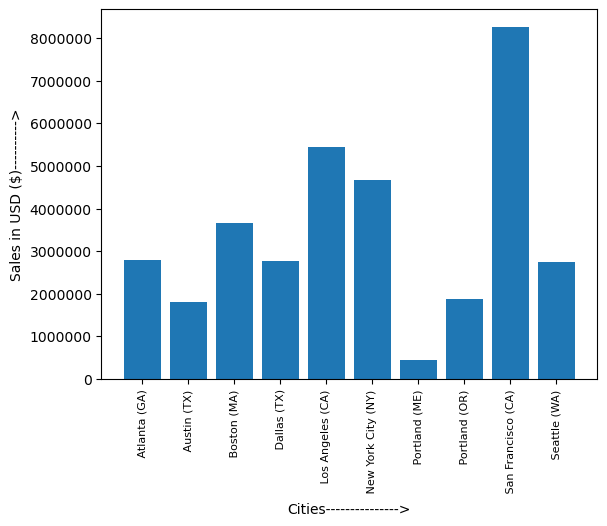

In [275]:
cities_unsorted=all_data["City"].unique()
cities_sort=sorted(xPlot)
yPlot=groupbycity["Sales"]
plt.ticklabel_format(style='plain')
plt.bar(cities_sort,yPlot)
plt.xticks(cities_sort,rotation="vertical",size=8)
plt.xlabel("Cities--------------->")
plt.ylabel("Sales in USD ($)---------->")
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [210]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])

C:\Users\rk853\AppData\Local\Temp\ipykernel_2648\425601281.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])


In [211]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [212]:
all_data["Hours"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute

In [213]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
186846,259354,iPhone,1,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.0,San Francisco (CA),16,0
186847,259355,iPhone,1,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.0,San Francisco (CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


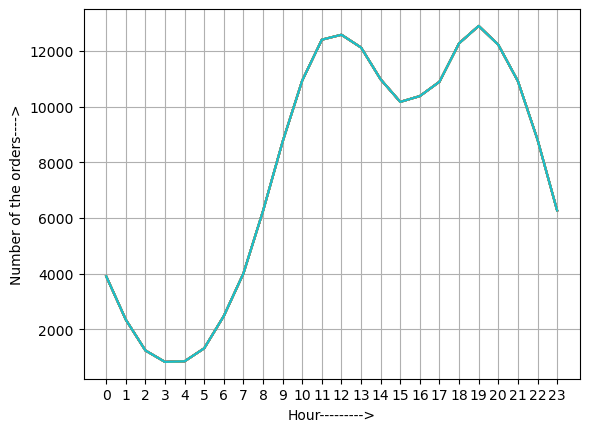

In [214]:
hours=[hour for hour,df in all_data.groupby("Hours")]
yplot=all_data.groupby(['Hours']).count()
plt.plot(hours,yplot)
plt.xticks(hours)
plt.ticklabel_format(style="plain")
plt.grid()
plt.xlabel("Hour--------->")
plt.ylabel("Number of the orders---->")
plt.show()

My recommandation is around 11 am or 7pm

#### Question 4: What products are most often sold together?

In [215]:
df=all_data[all_data["Order ID"].duplicated(keep=False)]

In [216]:
df.loc[:,["Product_group"]]=df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))

In [217]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minute,Product_group
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.0,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.0,San Francisco (CA),13,49,"Google Phone,USB-C Charging Cable"


In [218]:
df=df[["Order ID","Product_group"]].drop_duplicates()
df

,Order ID,Product_group
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [219]:
from itertools import combinations
from collections import Counter

count=Counter()

for r in df["Product_group"]:
    rlist=r.split(",")
    count.update(Counter(combinations(rlist,2)))

for key ,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### this is for my knowledge
df1={"A":["Ram","Ram","Raj","Raj","Om","Reema"],"B":[4,1,5,5,2,8]}
a=pd.DataFrame(df1)
c=a[a['A'].duplicated(keep=False)]
c

#### Quetion 5: What product sold the most? Why do you think it sold the most?

In [258]:
Removed_Date_data=all_data
Removed_Date_data=Removed_Date_data.drop("Order Date", axis=1)

Product_group= Removed_Date_data.groupby('Product')
Ordered_Quantity=Product_group.sum()['Quantity Ordered']
product_Names=[product for product,df in Product_group]

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

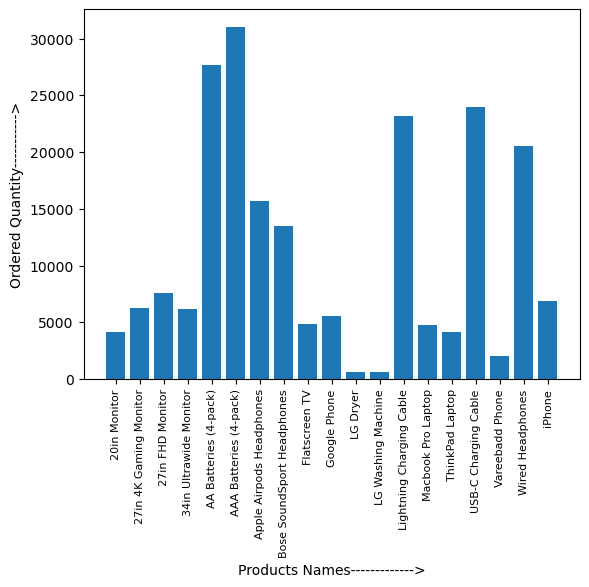

In [276]:
plt.bar(product_Names,Ordered_Quantity)
plt.xticks(product_Names,rotation="vertical",size=8)
plt.xlabel("Products Names------------->")
plt.ylabel("Ordered Quantity----------->")
plt.show()

C:\Users\rk853\AppData\Local\Temp\ipykernel_2648\418604480.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_Names,rotation='vertical',size=8)


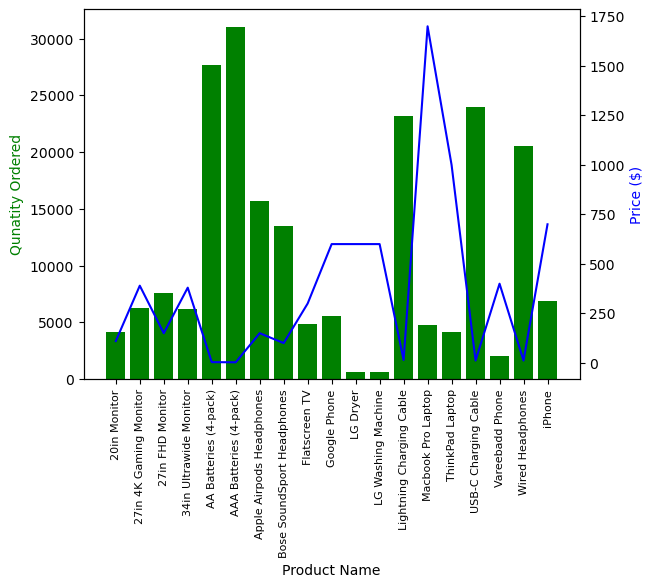

In [286]:
prices=all_data.groupby("Product")["Price Each"].mean()

fig, ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(product_Names, Ordered_Quantity, color='g')
ax2.plot(product_Names, prices,'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Qunatity Ordered", color='g')
ax2.set_ylabel("Price ($)", color='b')
ax1.set_xticklabels(product_Names,rotation='vertical',size=8)
plt.show()

In [287]:
prices=all_data.groupby("Product")["Price Each"].mean()
prices

Product
20in Monitor                  109.99
27in 4K Gaming Monitor        389.99
27in FHD Monitor              149.99
34in Ultrawide Monitor        379.99
AA Batteries (4-pack)           3.84
AAA Batteries (4-pack)          2.99
Apple Airpods Headphones       150.0
Bose SoundSport Headphones     99.99
Flatscreen TV                  300.0
Google Phone                   600.0
LG Dryer                       600.0
LG Washing Machine             600.0
Lightning Charging Cable       14.95
Macbook Pro Laptop            1700.0
ThinkPad Laptop               999.99
USB-C Charging Cable           11.95
Vareebadd Phone                400.0
Wired Headphones               11.99
iPhone                         700.0
Name: Price Each, dtype: object

# Thank You